# Analysis and Clustering of Personality

## Initial packages Installation

In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Initial Dataset

In [2]:
df = pd.read_csv('archive\data.csv', delimiter='\\t')
df.head(10)

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
5,13,31,1,2,1,2,US,1,5,2,...,4,2,1,3,3,5,5,4,5,3
6,5,20,1,2,1,5,US,5,1,5,...,3,1,5,1,4,1,4,3,3,4
7,4,23,2,1,1,2,IN,4,3,5,...,3,1,5,1,4,1,5,3,2,5
8,5,39,1,2,3,4,US,3,1,5,...,3,3,5,3,5,1,5,3,4,5
9,3,18,1,2,1,5,US,1,4,2,...,4,2,5,2,4,1,4,3,4,4


## Data Cleaning and Preprocessing

In [3]:
df.columns = ['race','age','engnat','gender','hand','source','country',
'E1','E2','E3','E4','E5','E6','E7','E8','E9','E10',    
'N1','N2','N3','N4','N5','N6','N7','N8','N9','N10',
'A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
'O1','O2','O3','O4','O5','O6','O7','O8','O9','O10']
df2 = df
df2["O"] = df2["O1"]+df2["O2"]+df2['O3']+df2['O4']+df2['O5']+df2['O6']+df2['O7']+df2['O8']+df2['O9']+df2['O10']
df2["O"] = df2["O"]/10
df2["C"] = df2["C1"]+df2["C2"]+df2['C3']+df2['C4']+df2['C5']+df2['C6']+df2['C7']+df2['C8']+df2['C9']+df2['C10']
df2["C"] = df2["C"]/10
df2["E"] = df2["E1"]+df2["E2"]+df2['E3']+df2['E4']+df2['E5']+df2['E6']+df2['E7']+df2['E8']+df2['E9']+df2['E10']
df2["E"] = df2["E"]/10
df2["A"] = df2["A1"]+df2["A2"]+df2['A3']+df2['A4']+df2['A5']+df2['A6']+df2['A7']+df2['A8']+df2['A9']+df2['A10']
df2["A"] = df2["A"]/10
df2["N"] = df2["N1"]+df2["N2"]+df2['N3']+df2['N4']+df2['N5']+df2['N6']+df2['N7']+df2['N8']+df2['N9']+df2['N10']
df2["N"] = df2["N"]/10
df2.drop_duplicates(inplace = True)
to_drop = ['race','age','engnat','gender','hand','source','country',
'E1','E2','E3','E4','E5','E6','E7','E8','E9','E10',    
'N1','N2','N3','N4','N5','N6','N7','N8','N9','N10',
'A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
'O1','O2','O3','O4','O5','O6','O7','O8','O9','O10']
df2.drop(to_drop, inplace=True, axis=1) #Removing data that would be useless to me
for (columnName, columnData) in df2.iteritems():
    for x in df2.index:
        if df2.loc[x, columnName] == 0:
            df2.drop(x, inplace = True)

## Data Visualisation

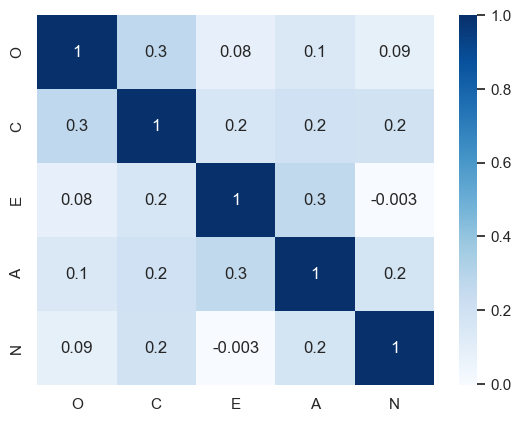

In [4]:
corr = df2.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

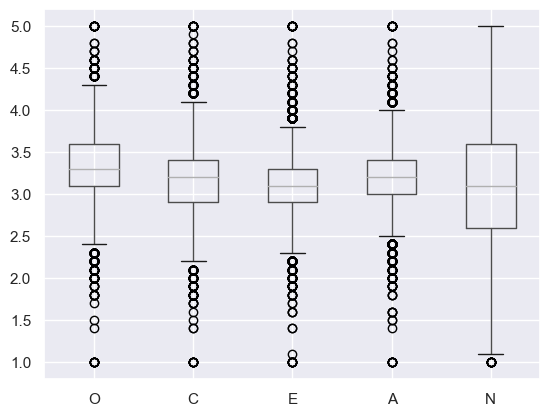

In [5]:
boxplot = df2.boxplot(column=["O","C","E","A","N"]) 

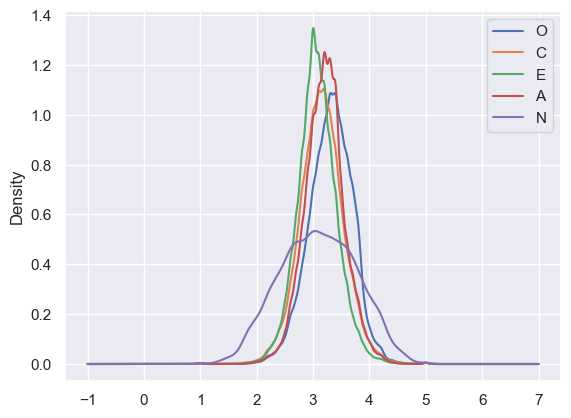

In [6]:
ax = df2.plot.kde()

## K-Means

### Optimal Number of Clusters

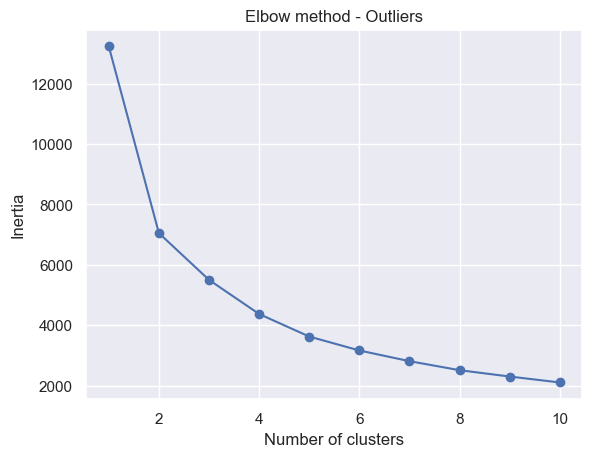

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
s = df2[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
s= s.dropna()
pca = PCA(n_components=2)
principalComponentsNoOutliers = pca.fit_transform(s)
principalDfNO = pd.DataFrame(data = principalComponentsNoOutliers, columns = ['PC1', 'PC2'])
data1 = list(zip(principalDf['PC1'], principalDf['PC2']))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    inertias.append(kmeans.inertia_)
pyplot.plot(range(1,11), inertias, marker='o')
pyplot.title('Elbow method - Outliers')
pyplot.xlabel('Number of clusters')
pyplot.ylabel('Inertia')
pyplot.show() 

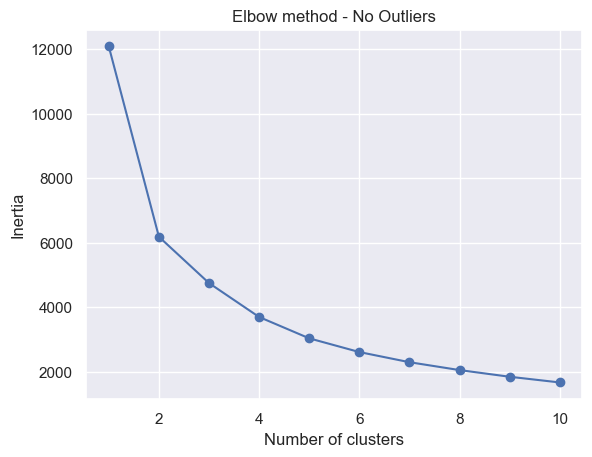

In [8]:
data2 = list(zip(principalDfNO['PC1'], principalDfNO['PC2']))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertias.append(kmeans.inertia_)

pyplot.plot(range(1,11), inertias, marker='o')
pyplot.title('Elbow method - No Outliers')
pyplot.xlabel('Number of clusters')
pyplot.ylabel('Inertia')
pyplot.show() 

### K-Means Outlier Clustering

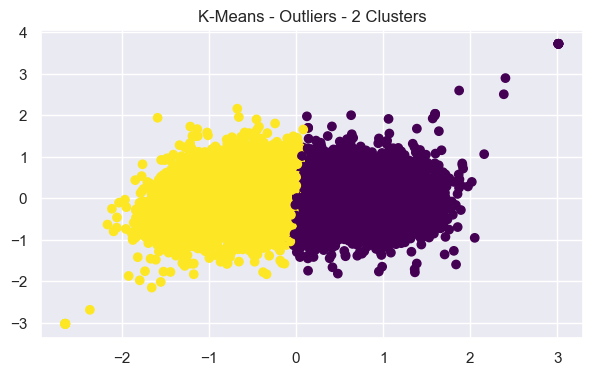

Silhouette Score: 0.407


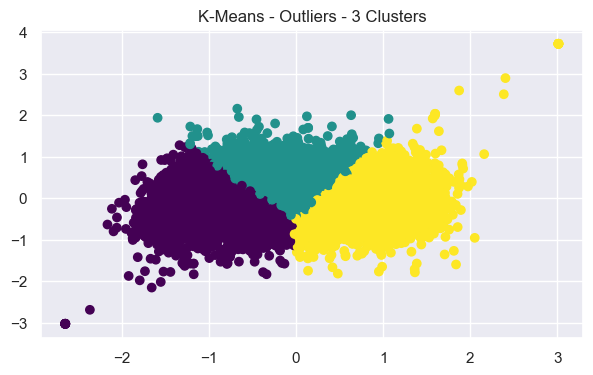

Silhouette Score: 0.320


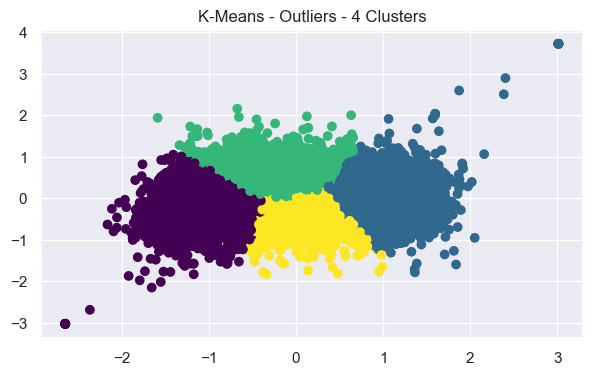

Silhouette Score: 0.321


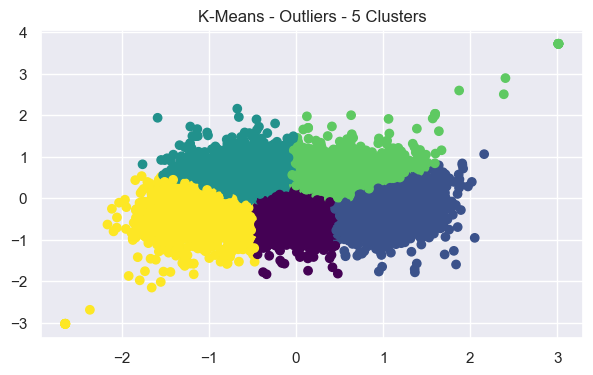

Silhouette Score: 0.325


In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means - Outliers - 2 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=kmeans.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data1, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(data1)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means - Outliers - 3 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=kmeans3.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data1, kmeans3.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(data1)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means - Outliers - 4 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=kmeans4.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data1, kmeans4.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

kmeans = KMeans(n_clusters=5)
kmeans.fit(data1)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means - Outliers - 5 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=kmeans.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data1, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

### K-Means No Outlier Clustering

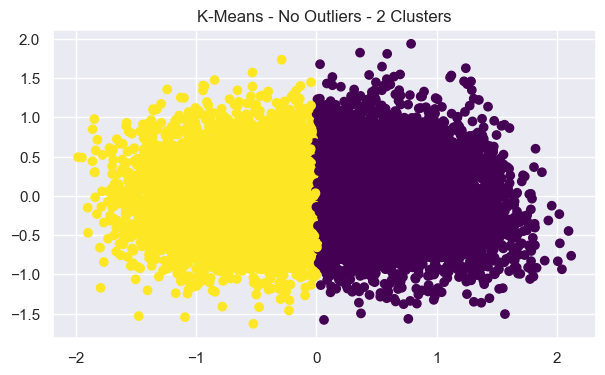

Silhouette Score: 0.413


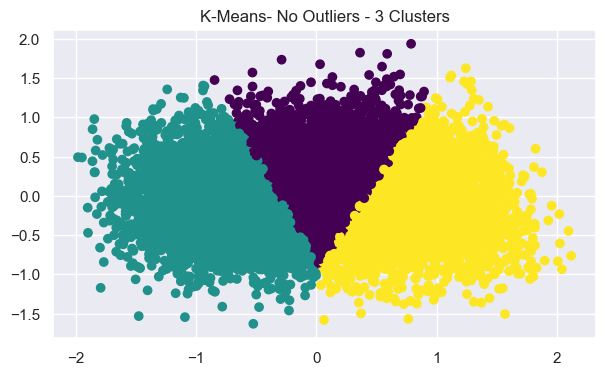

Silhouette Score: 0.321


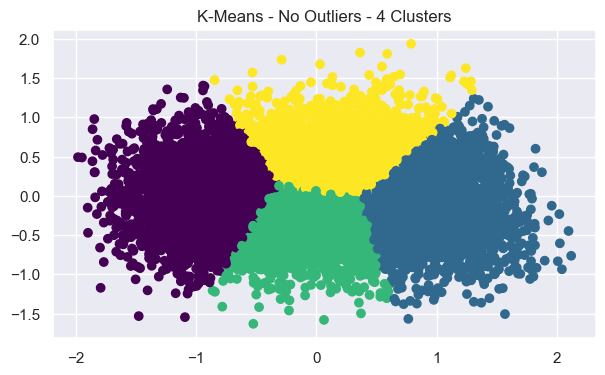

Silhouette Score: 0.331


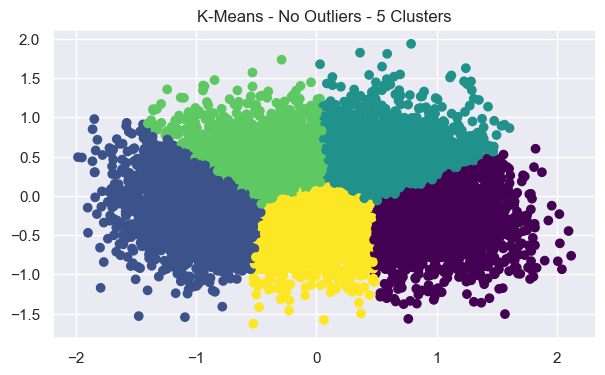

Silhouette Score: 0.327


In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data2)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means - No Outliers - 2 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=kmeans.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data2, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

kmeans = KMeans(n_clusters=3)
kmeans.fit(data2)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means- No Outliers - 3 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=kmeans.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data2, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

kmeans = KMeans(n_clusters=4)
kmeans.fit(data2)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means - No Outliers - 4 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=kmeans.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data2, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

kmeans = KMeans(n_clusters=5)
kmeans.fit(data2)
pyplot.figure(figsize=(7, 4))  
pyplot.title("K-Means - No Outliers - 5 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=kmeans.labels_, cmap='viridis')
pyplot.show() 

score = silhouette_score(data2, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

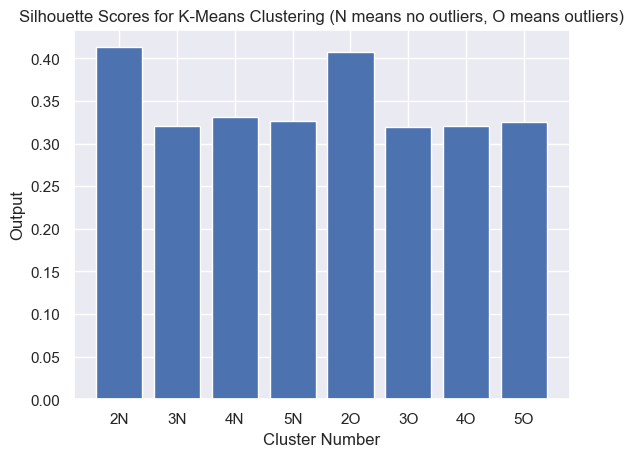

In [33]:
x = ['2N', '3N', '4N', '5N',    '2O', '3O', '4O', '5O']
silhouettes = [0.413, 0.321, 0.331, 0.327,    0.407, 0.320, 0.321, 0.325]

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, silhouettes)
pyplot.xlabel("Cluster Number")
pyplot.ylabel("Output")
pyplot.title("Silhouette Scores for K-Means Clustering (N means no outliers, O means outliers)")

pyplot.xticks(x_pos, x)

pyplot.show()

## DBSCAN

### DBSCAN Outlier Optimisation

In [11]:
X = principalDf.loc[:, ["PC1","PC2"]].values

min_samples = range(10,21)
eps = np.arange(0.05,0.13, 0.01)
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = silhouette_score(X, labels)
        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5213752748862419
min_samples: 12
eps: 0.12000000000000001


In [12]:
from collections import Counter
labels = DBSCAN(min_samples=min_samples, eps = 0.12).fit(principalDf).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(principalDf, labels)}")

Number of clusters: 2
Number of outliers: 299
Silhouette_score: 0.5213752748862419


### DBSCAN Outlier Clustering

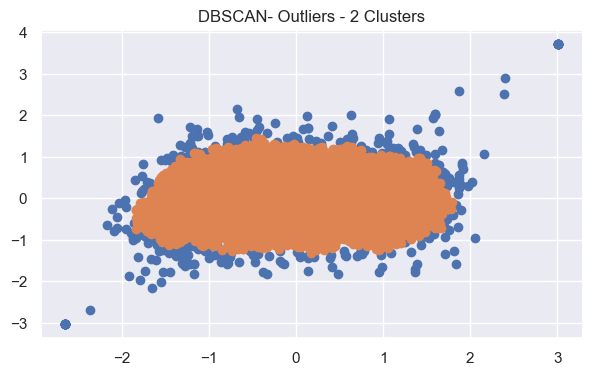

Silhouette Score: 0.521375


In [13]:
# define the model
dbscan_model = DBSCAN(eps=0.12, min_samples=12)

X = principalDf.loc[:, ["PC1","PC2"]].values

# train the model
dbscan_model.fit(X)

# assign each data point to a cluster
dbscan_result = dbscan_model.labels_.astype(int)

# get all of the unique clusters
dbscan_cluster = unique(dbscan_result)

pyplot.figure(figsize=(7, 4))  
pyplot.title("DBSCAN- Outliers - 2 Clusters")

# plot the DBSCAN clusters
for dbscan_clusters in dbscan_cluster:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_clusters)
    # make the plot
    
    pyplot.scatter(X[index, 0], X[index, 1], cmap='viridis')

# show the DBSCAN plot
pyplot.show()
score = silhouette_score(X, dbscan_model.labels_, metric='euclidean')
print('Silhouette Score: %.6f' % score)

### DBSCAN No Outlier Optimisation

In [14]:
X = principalDfNO.loc[:, ["PC1","PC2"]].values

######

min_samples = range(10,21)
eps = np.arange(0.05,0.13, 0.01)

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = silhouette_score(X, labels)
        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.4591207271570251
min_samples: 11
eps: 0.12000000000000001


In [15]:
labels = DBSCAN(min_samples=min_samples, eps = 0.12).fit(principalDfNO).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(principalDfNO, labels)}")

Number of clusters: 2
Number of outliers: 196
Silhouette_score: 0.4591207271570251


### DBSCAN No Outlier Clustering

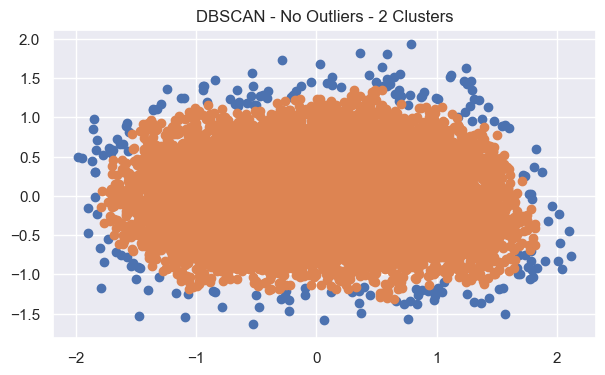

Silhouette Score: 0.459121


In [16]:
dbscan_model = DBSCAN(eps=0.12, min_samples=11)

X = principalDfNO.loc[:, ["PC1","PC2"]].values

# train the model
dbscan_model.fit(X)

# assign each data point to a cluster
#dbscan_result = dbscan_model.predict(df2[["O","C","E","A","N"]])
dbscan_result = dbscan_model.labels_.astype(int)

# get all of the unique clusters
dbscan_cluster = unique(dbscan_result)

pyplot.figure(figsize=(7, 4))  
pyplot.title("DBSCAN - No Outliers - 2 Clusters")

# plot the DBSCAN clusters
for dbscan_clusters in dbscan_cluster:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_clusters)
    # make the plot
    
    pyplot.scatter(X[index, 0], X[index, 1], cmap='viridis')

# show the DBSCAN plot
pyplot.show()
score = silhouette_score(X, dbscan_model.labels_, metric='euclidean')
print('Silhouette Score: %.6f' % score)

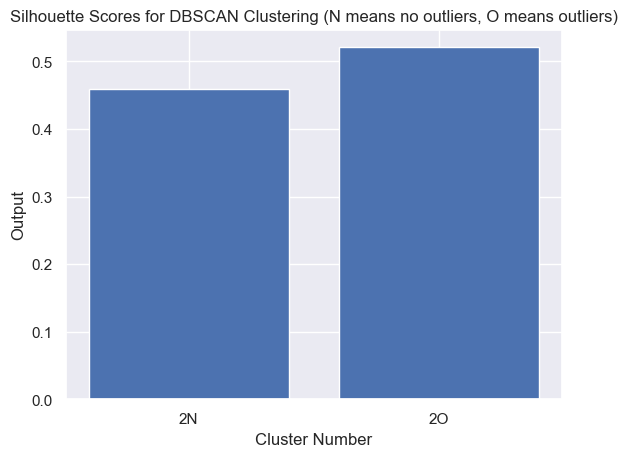

In [34]:
x = ['2N','2O']
silhouettes = [0.459, 0.521]

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, silhouettes)
pyplot.xlabel("Cluster Number")
pyplot.ylabel("Output")
pyplot.title("Silhouette Scores for DBSCAN Clustering (N means no outliers, O means outliers)")

pyplot.xticks(x_pos, x)

pyplot.show()

## GMM

### GMM Outliers

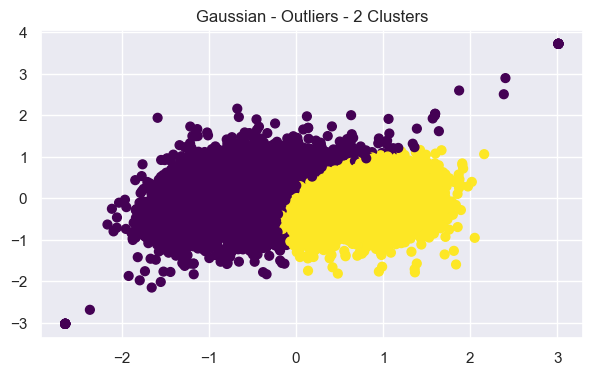

Silhouette Score: 0.395


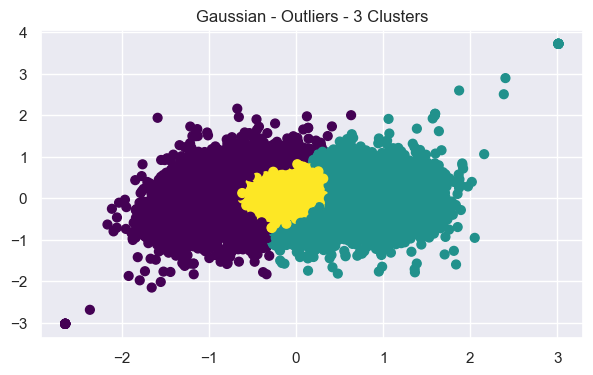

Silhouette Score: 0.286


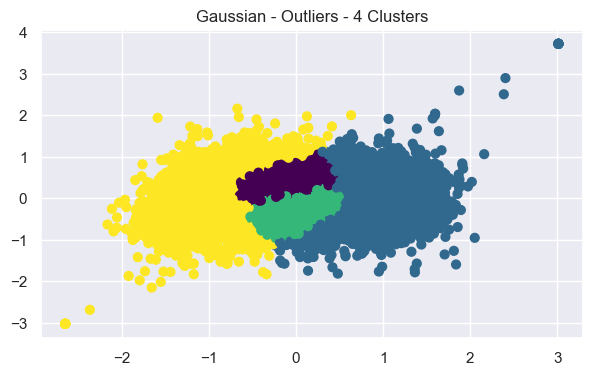

Silhouette Score: 0.256


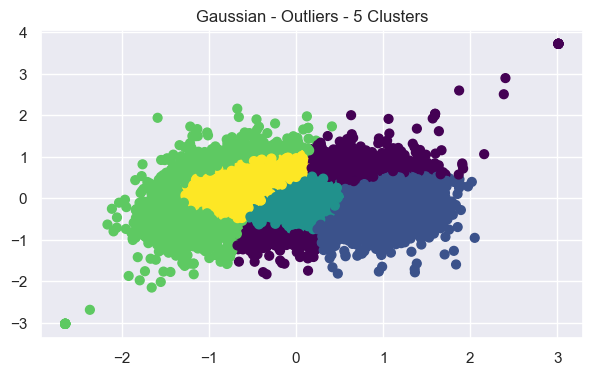

Silhouette Score: 0.273


In [17]:
X = principalDf.loc[:, ["PC1","PC2"]].values

gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - Outliers - 2 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - Outliers - 3 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - Outliers - 4 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - Outliers - 5 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

### GMM No Outliers

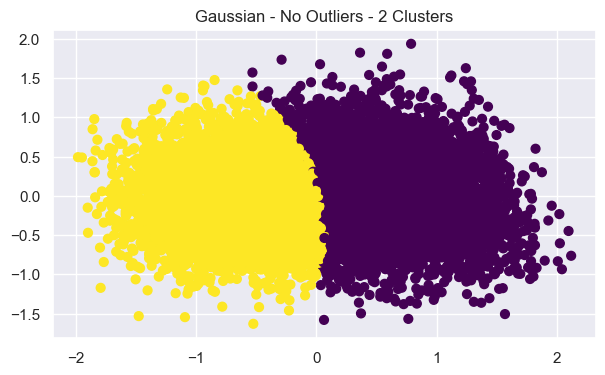

Silhouette Score: 0.411


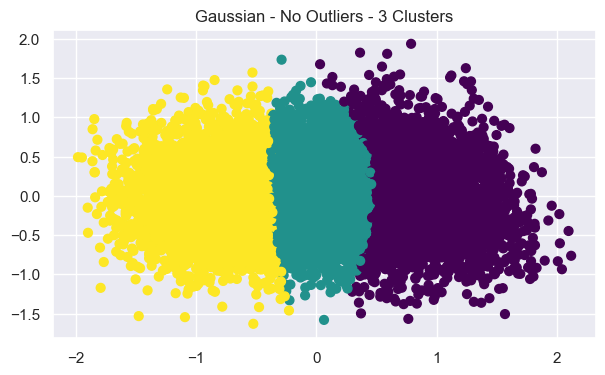

Silhouette Score: 0.316


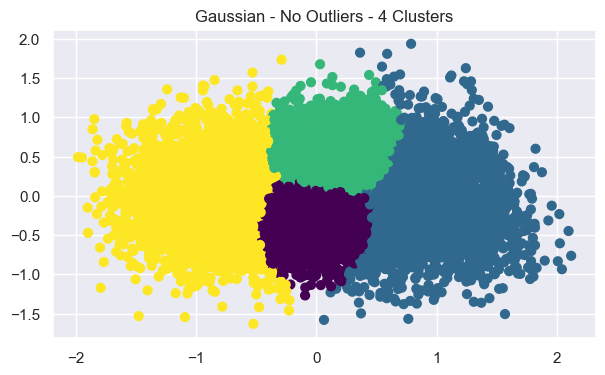

Silhouette Score: 0.309


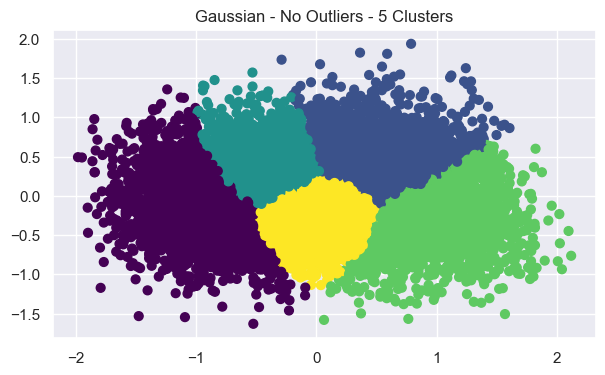

Silhouette Score: 0.316


In [18]:
X = principalDfNO.loc[:, ["PC1","PC2"]].values

gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - No Outliers - 2 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - No Outliers - 3 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - No Outliers - 4 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Gaussian - No Outliers - 5 Clusters")
pyplot.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
pyplot.show()

score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

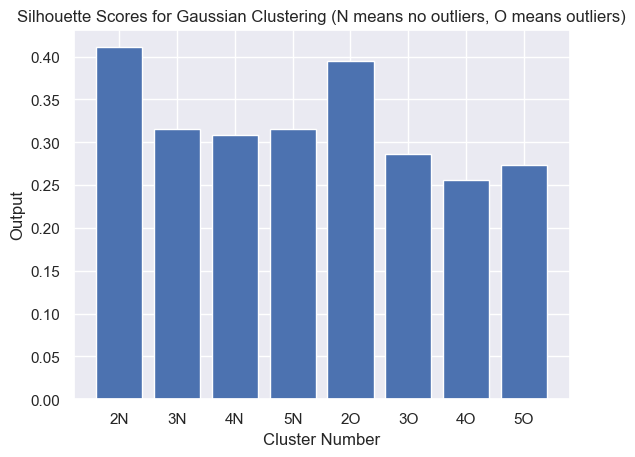

In [28]:
x = ['2N', '3N', '4N', '5N',    '2O', '3O', '4O', '5O']
silhouettes = [0.411, 0.316, 0.309, 0.316,    0.395, 0.286, 0.256, 0.273]

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, silhouettes)
pyplot.xlabel("Cluster Number")
pyplot.ylabel("Output")
pyplot.title("Silhouette Scores for Gaussian Clustering (N means no outliers, O means outliers)")

pyplot.xticks(x_pos, x)

pyplot.show()

## Hierarchical

### Dendrograms

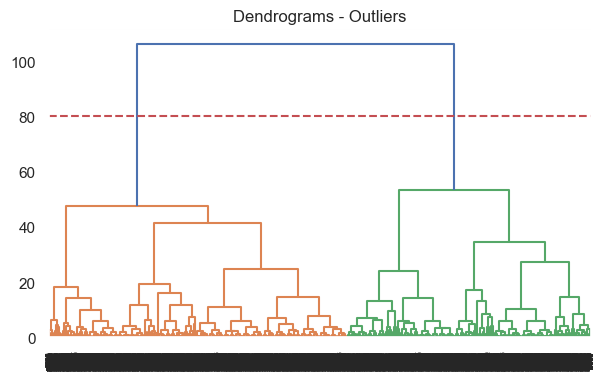

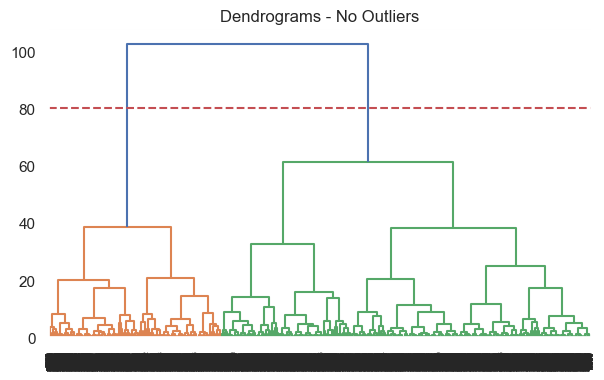

In [19]:
pyplot.figure(figsize=(7, 4))  
pyplot.title("Dendrograms - Outliers")  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))
pyplot.axhline(y=80, color='r', linestyle='--')
pyplot.show()

pyplot.figure(figsize=(7, 4))  
pyplot.title("Dendrograms - No Outliers")  
dend = shc.dendrogram(shc.linkage(principalDfNO, method='ward'))
pyplot.axhline(y=80, color='r', linestyle='--')
pyplot.show()

### Hierarchical Outliers

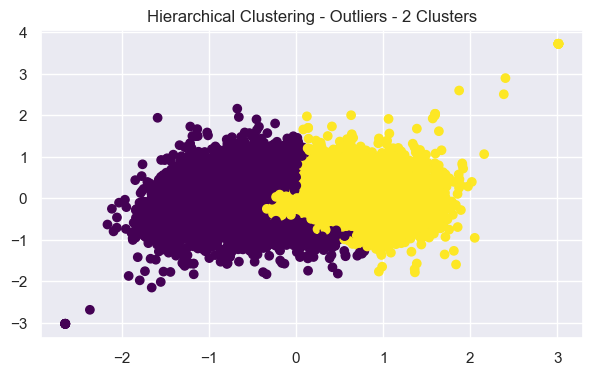

Silhouette Score: 0.371


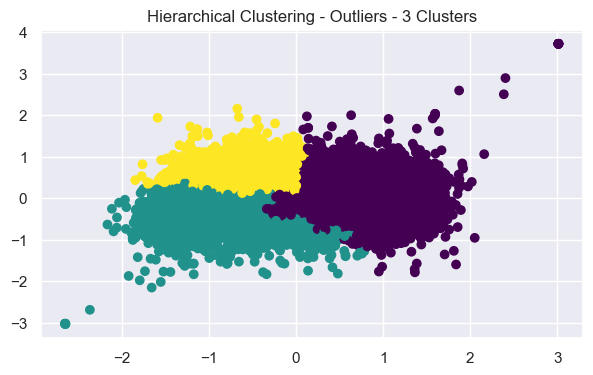

Silhouette Score: 0.315


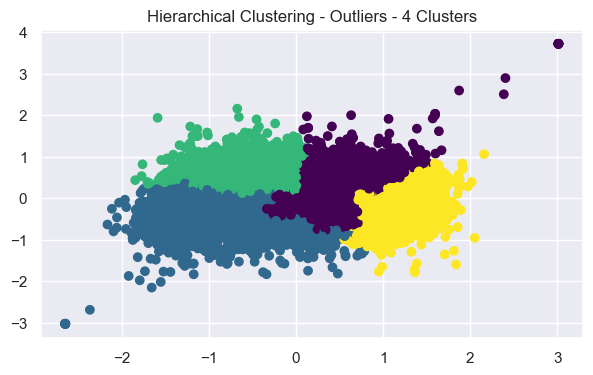

Silhouette Score: 0.260


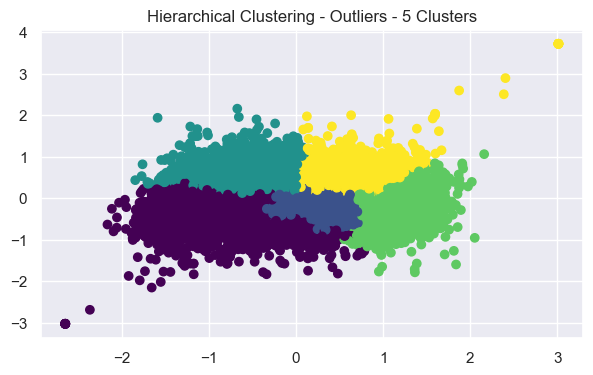

Silhouette Score: 0.276


In [38]:
X = principalDf.loc[:, ["PC1","PC2"]].values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDf)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - Outliers - 2 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDf)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - Outliers - 3 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDf)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - Outliers - 4 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDf)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - Outliers - 5 Clusters")
pyplot.scatter(principalDf['PC1'], principalDf['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

### Hierarchical No Outliers

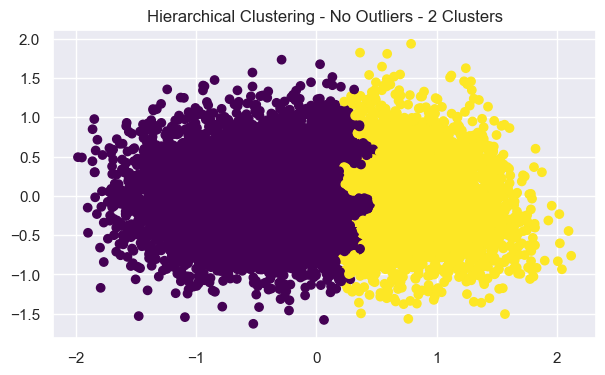

Silhouette Score: 0.382


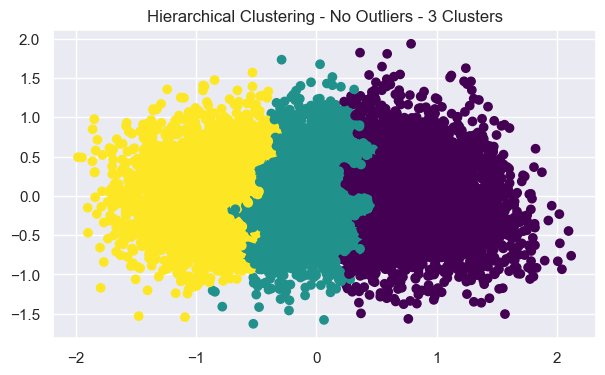

Silhouette Score: 0.301


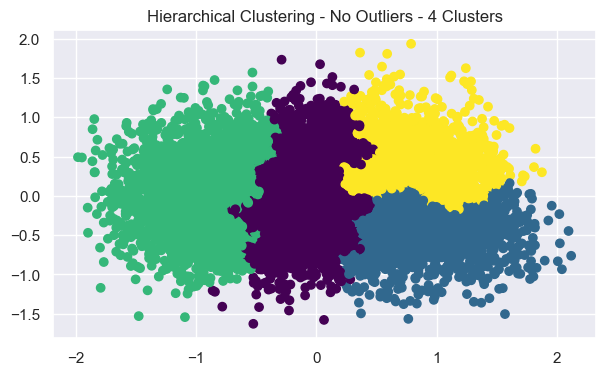

Silhouette Score: 0.275


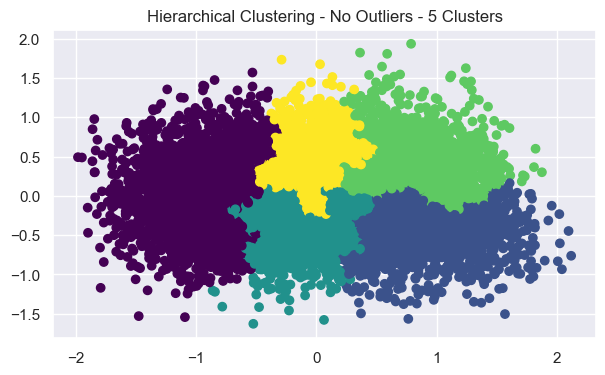

Silhouette Score: 0.255


In [21]:
X = principalDfNO.loc[:, ["PC1","PC2"]].values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDfNO)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - No Outliers - 2 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDfNO)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - No Outliers - 3 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDfNO)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - No Outliers - 4 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDfNO)
pyplot.figure(figsize=(7, 4))  
pyplot.title("Hierarchical Clustering - No Outliers - 5 Clusters")
pyplot.scatter(principalDfNO['PC1'], principalDfNO['PC2'], c=cluster.labels_, cmap='viridis') 
pyplot.show()

score = silhouette_score(X, cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

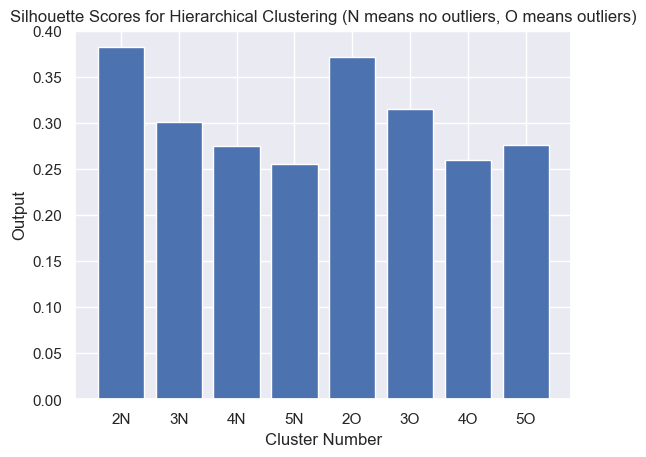

In [27]:
x = ['2N', '3N', '4N', '5N', '2O', '3O', '4O', '5O']
silhouettes = [0.382, 0.301, 0.275, 0.255, 0.371, 0.315, 0.260, 0.276]

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, silhouettes)
pyplot.xlabel("Cluster Number")
pyplot.ylabel("Output")
pyplot.title("Silhouette Scores for Hierarchical Clustering (N means no outliers, O means outliers)")

pyplot.xticks(x_pos, x)

pyplot.show()

#https://benalexkeen.com/bar-charts-in-matplotlib/ Accessed 16/04/23

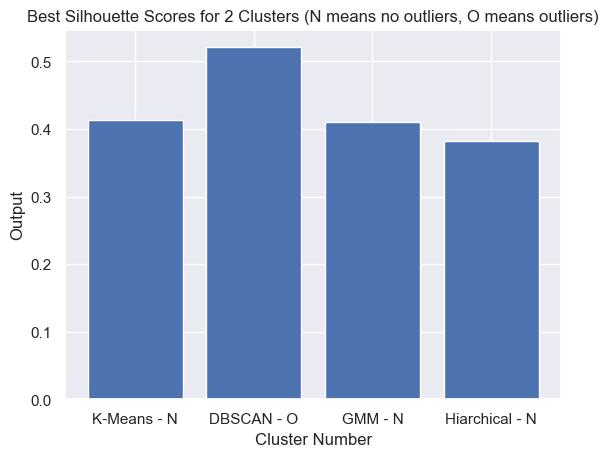

In [35]:
x = ['K-Means - N', 'DBSCAN - O', 'GMM - N', 'Hiarchical - N']
silhouettes = [0.413, 0.521, 0.411, 0.382]

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, silhouettes)
pyplot.xlabel("Cluster Number")
pyplot.ylabel("Output")
pyplot.title("Best Silhouette Scores for 2 Clusters (N means no outliers, O means outliers)")

pyplot.xticks(x_pos, x)

pyplot.show()

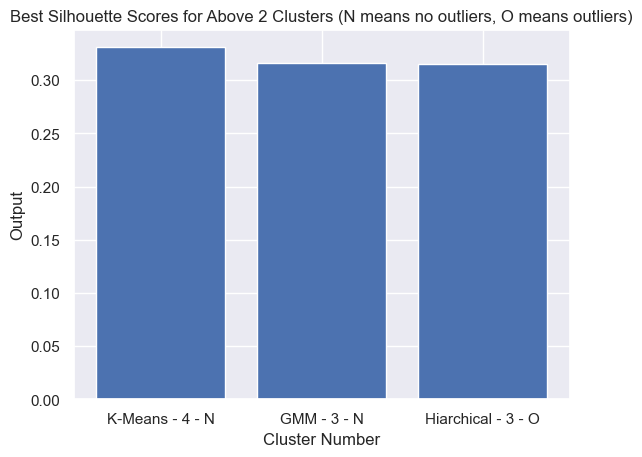

In [37]:
x = ['K-Means - 4 - N', 'GMM - 3 - N', 'Hiarchical - 3 - O']
silhouettes = [0.331, 0.316, 0.315]

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, silhouettes)
pyplot.xlabel("Cluster Number")
pyplot.ylabel("Output")
pyplot.title("Best Silhouette Scores for Above 2 Clusters (N means no outliers, O means outliers)")

pyplot.xticks(x_pos, x)

pyplot.show()

## Cluster Analysis 3 Clusters

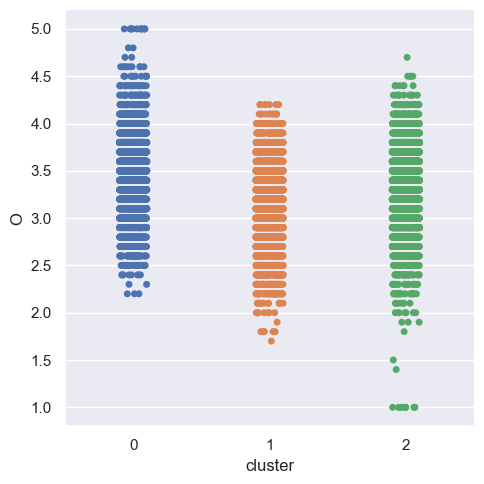

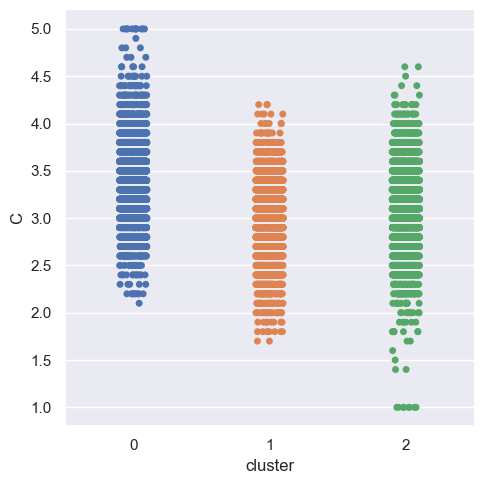

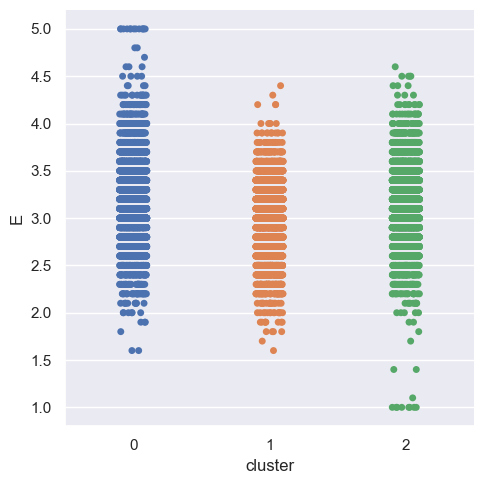

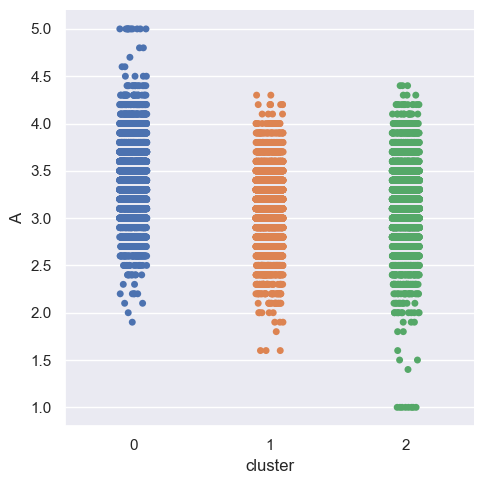

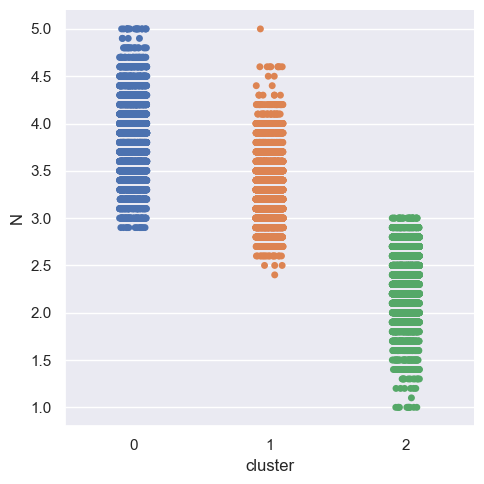

In [22]:
result = pd.DataFrame({'O': df2['O'], 'C': df2['C'], 'E': df2['E'], 'A': df2['A'], 'N': df2['N'], 'cluster': kmeans3.labels_})
sns.catplot(data=result, x="cluster", y="O")
sns.catplot(data=result, x="cluster", y="C")
sns.catplot(data=result, x="cluster", y="E")
sns.catplot(data=result, x="cluster", y="A")
sns.catplot(data=result, x="cluster", y="N")


## Cluster Analysis 4 Clusters

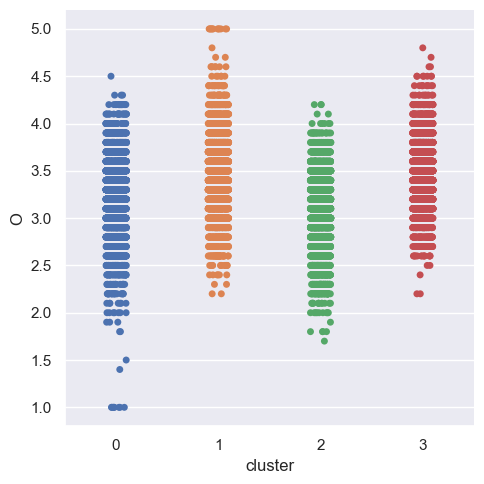

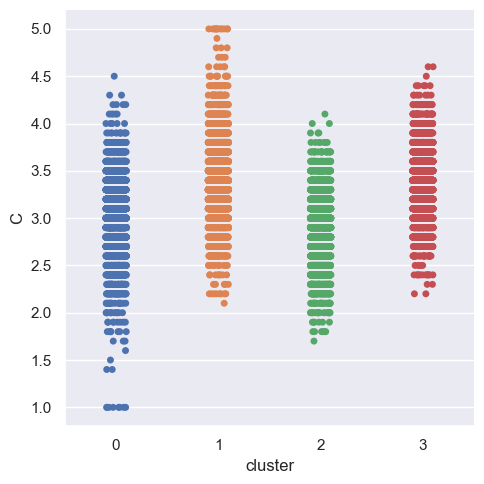

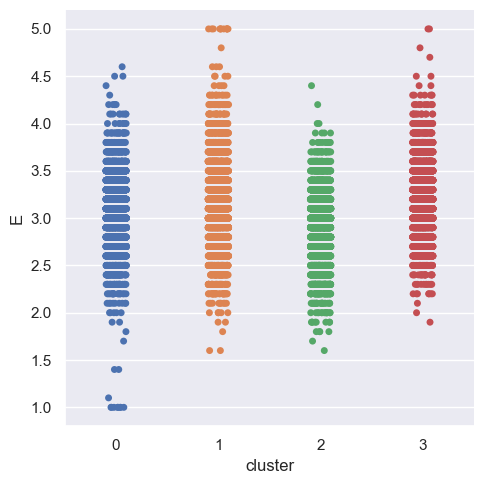

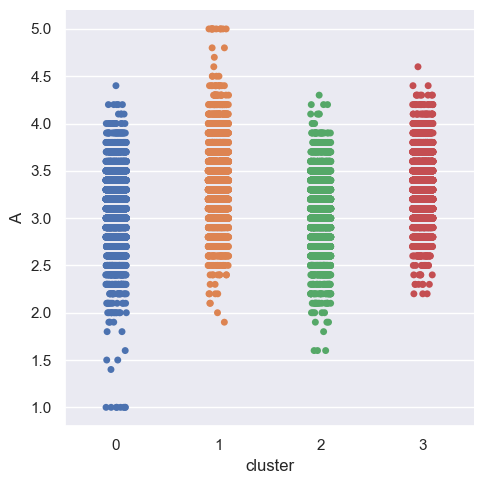

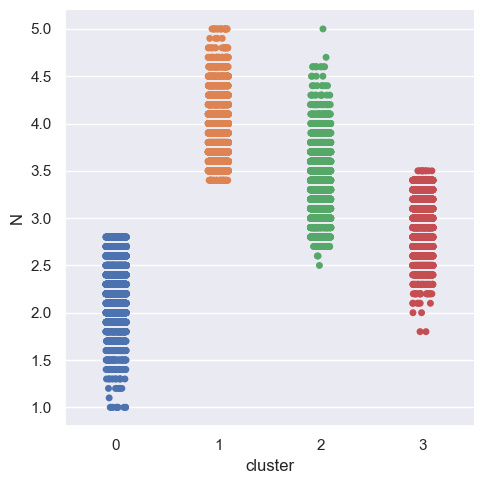

In [23]:
result = pd.DataFrame({'O': df2['O'], 'C': df2['C'], 'E': df2['E'], 'A': df2['A'], 'N': df2['N'], 'cluster': kmeans4.labels_})
sns.catplot(data=result, x="cluster", y="O")
sns.catplot(data=result, x="cluster", y="C")
sns.catplot(data=result, x="cluster", y="E")
sns.catplot(data=result, x="cluster", y="A")
sns.catplot(data=result, x="cluster", y="N")